## Imports {-}

In [1]:
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy
import re
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
import spacy
nlp = spacy.load('en_core_web_sm')
all_stopwords = nlp.Defaults.stop_words
lemmatizer = WordNetLemmatizer()
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

from typing import List
import sys

sys.path.append('.')
import pandas as pd
import os

import string
from nltk.corpus import stopwords
from functools import reduce

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import gensim
import gensim.corpora as corpora
import gensim.models

import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'/mallet-2.0.8'})
from gensim.models import CoherenceModel

!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

from pprint import pprint

distutils: /Applications/anaconda3/include/python3.8/UNKNOWN
sysconfig: /Applications/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None
distutils: /Applications/anaconda3/include/python3.8/UNKNOWN
sysconfig: /Applications/anaconda3/include/python3.8
user = False
home = None
root = None
prefix = None


In [3]:
topic_modeling_df = pd.read_csv('/Users/JoKerry/Desktop/CSML1030 - Machine Learning Capstone/mimic_admissions_and_discharge/2 TFIDF/Admissions/topic_modeling_admission_df_with_age_filtered.csv')
topic_modeling_df

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HADM_ID  SEQ_NUM  ICD9_CODE           CATEGORY  \
0      153714.0      1.0       5849  Discharge summary   
1      165367.0      1.0      51881      Nursing/other   
2      129565.0      1.0      51881  Discharge summary   
3      141170.0      1.0      51881            Nursing   
4      184643.0      1.0       5849  Discharge summary   
...         ...      ...        ...                ...   
31972  154989.0     32.0      53081      Nursing/other   
31973  133827.0     32.0      53081          Radiology   
31974  179548.0     32.0       4019  Discharge summary   
31975  129551.0     36.0       4019          Radiology   
31976  170349.0     39.0      53081                ECG   

                                                    TEXT  AGE  ROW_ID  \
0      CHIEF COMPLAINT: \n\nPRESENT ILLNESS: This is ...   51   29492   
1      CHIEF COMPLAINT: \n\nPRESENT ILLNESS: \n\nMEDI...   65   36317   
2      CHIEF COMPLAINT: shortness of breath\n\nPRESEN...   79   47150   
3      CHIEF COMPLAINT: \n\nPRESENT ILLNESS: \n\nMEDI...   65   36132   
4      CHIEF COMPLAINT: # PEA arrest\n\nPRESENT ILLNE...   59   17278   
...                                                  ...  ...     ...   
31972  CHIEF COMPLAINT: \n\nPRESENT ILLNESS: \n\nMEDI...   65   30465   
31973  CHIEF COMPLAINT: \n\nPRESENT ILLNESS: \n\nMEDI...   73   48045   
31974  CHIEF COMPLAINT: Weakness/Fluid Overload\n\nPR...   79   48580   
31975  CHIEF COMPLAINT: \n\nPRESENT ILLNESS: \n\nMEDI...   51   51769   
31976  CHIEF COMPLAINT: \n\nPRESENT ILLNESS: \n\nMEDI...   65   45831   

       SUBJECT_ID  
0           24136  
1           29799  
2           62854  
3           29631  
4           14106  
...           ...  
31972       24955  
31973       65659  
31974       67348  
31975       77282  
31976       58773  

[31977 rows x 8 columns]

## Cleaning Text {-}

In [4]:
my_stop_words = ['discharge', 'diagnosis', 'medications', 'medication', 'disposition', 'condition', 'instructions', 
                 'status', 'secondary', 'changes', 'instruction', 'change', 'home', 'name', 'hospital', 'daily',
                'hour', 'follow', 'care', 'time', 'day', 'week', 'with', 'disp', 'discharged', 'admitted', 
                 'namepattern', 'none']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
X = topic_modeling_df.TEXT

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    # Remove new line characters
    document = document.replace("\n", ' ')
    # Punctuation
    document = re.sub(r'[^\w\s]', ' ', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    #Removing Numbers
    document = ''.join(i for i in document if not i.isdigit())
    #Removing Stopwords
    document = ' '.join([i for i in document.split() if not i in all_stopwords])
    #Removing certain sized words
    document = ' '.join([i for i in document.split() if len(i)>3])
    # Contractions
    document = contractions.fix(document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    #Removing my_stop_words
    document = ' '.join([i for i in document.split() if not i in my_stop_words])
    
    #return document
    documents.append(document)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
documents

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['chief complaint present illness this year gentleman diagnosed month cardiomyopathy following viral illness inferior apical akinesis ejection fraction estimated percent sent stable cardiac renal function heart failure regiment prior admission began feel unwell nasal congestion fatigue five prior admission began experience nausea vomiting diarrhea evidence blood difficult keeping fluid able prior admission noted feeling cloudy thought confused brought emergency room location university college admission previously started regimen newly diagnosed viral cardiomyopathy including coreg coumadin lasix lisinopril changed valsartan when presented found reported creatinine potassium thought acute renal failure given liter normal saline bicarbonate insulin glucose kayexalate hyperkalemia transferred reported chest pain palpitation abdominal pain melena numbness tingling foot shortness breath lower extremity edema medical history notable viral cardiomyopathy diagnosed ejection fraction percent h

In [8]:
tokenized_words = [word_tokenize(i) for i in documents]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
tokenized_words

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['chief',
  'complaint',
  'present',
  'illness',
  'this',
  'year',
  'gentleman',
  'diagnosed',
  'month',
  'cardiomyopathy',
  'following',
  'viral',
  'illness',
  'inferior',
  'apical',
  'akinesis',
  'ejection',
  'fraction',
  'estimated',
  'percent',
  'sent',
  'stable',
  'cardiac',
  'renal',
  'function',
  'heart',
  'failure',
  'regiment',
  'prior',
  'admission',
  'began',
  'feel',
  'unwell',
  'nasal',
  'congestion',
  'fatigue',
  'five',
  'prior',
  'admission',
  'began',
  'experience',
  'nausea',
  'vomiting',
  'diarrhea',
  'evidence',
  'blood',
  'difficult',
  'keeping',
  'fluid',
  'able',
  'prior',
  'admission',
  'noted',
  'feeling',
  'cloudy',
  'thought',
  'confused',
  'brought',
  'emergency',
  'room',
  'location',
  'university',
  'college',
  'admission',
  'previously',
  'started',
  'regimen',
  'newly',
  'diagnosed',
  'viral',
  'cardiomyopathy',
  'including',
  'coreg',
  'coumadin',
  'lasix',
  'lisinopril',
  'chan

In [10]:
topic_modeling_series = pd.Series(tokenized_words)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
topic_modeling_series

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        [chief, complaint, present, illness, this, yea...
1        [chief, complaint, present, illness, medical, ...
2        [chief, complaint, shortness, breath, present,...
3        [chief, complaint, present, illness, medical, ...
4        [chief, complaint, arrest, present, illness, p...
                               ...                        
31972    [chief, complaint, present, illness, medical, ...
31973    [chief, complaint, present, illness, medical, ...
31974    [chief, complaint, weakness, fluid, overload, ...
31975    [chief, complaint, present, illness, medical, ...
31976    [chief, complaint, present, illness, medical, ...
Length: 31977, dtype: object

## Topic Modeling {-}

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(topic_modeling_series) #use entire corpus
id2word.filter_extremes(no_below=20, no_above=0.1)

# Create Corpus
texts = topic_modeling_series

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
print(id2word)

Dictionary(4881 unique tokens: ['abdominal', 'able', 'acute', 'adopted', 'akinesis']...)


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating {}-topic model'.format(num_topics))
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
limit=20; start=2; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=texts,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

Calculating 2-topic model


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculating 3-topic model
Calculating 4-topic model
Calculating 5-topic model
Calculating 6-topic model
Calculating 7-topic model
Calculating 8-topic model
Calculating 9-topic model
Calculating 10-topic model
Calculating 11-topic model
Calculating 12-topic model
Calculating 13-topic model
Calculating 14-topic model
Calculating 15-topic model
Calculating 16-topic model
Calculating 17-topic model
Calculating 18-topic model
Calculating 19-topic model


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


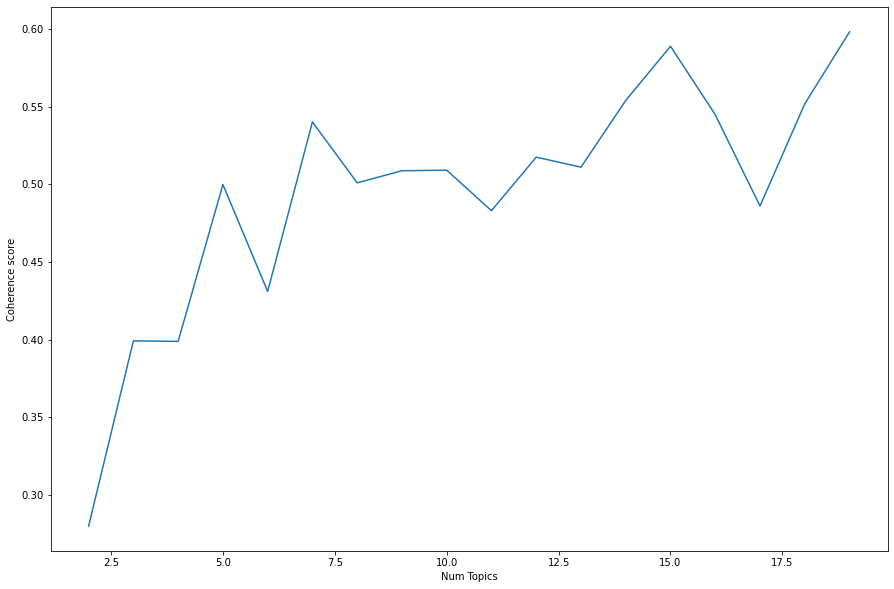

In [16]:
# show graph
x = range(start, limit, step)
plt.figure(figsize=(15, 10))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 2  has Coherence Value of 0.279877
Num Topics = 3  has Coherence Value of 0.399123
Num Topics = 4  has Coherence Value of 0.398797
Num Topics = 5  has Coherence Value of 0.499789
Num Topics = 6  has Coherence Value of 0.430928
Num Topics = 7  has Coherence Value of 0.540093
Num Topics = 8  has Coherence Value of 0.500861
Num Topics = 9  has Coherence Value of 0.508657
Num Topics = 10  has Coherence Value of 0.509023
Num Topics = 11  has Coherence Value of 0.482943
Num Topics = 12  has Coherence Value of 0.517405
Num Topics = 13  has Coherence Value of 0.51095
Num Topics = 14  has Coherence Value of 0.553915
Num Topics = 15  has Coherence Value of 0.588826
Num Topics = 16  has Coherence Value of 0.544729
Num Topics = 17  has Coherence Value of 0.485929
Num Topics = 18  has Coherence Value of 0.55175
Num Topics = 19  has Coherence Value of 0.59804


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Building LDA Model = LDA Model removing my_stop_words & featuring 30 topics
lda_model_optimal = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
pprint(lda_model_optimal.print_topics(num_topics=15, num_words=15))
doc_lda = lda_model_optimal[corpus]

[(0,
  '0.104*"liver" + 0.079*"acid" + 0.077*"cirrhosis" + 0.063*"transplant" + '
  '0.055*"folic" + 0.040*"varix" + 0.037*"hepatitis" + 0.029*"clean" + '
  '0.026*"spironolactone" + 0.025*"amputation" + 0.025*"cord" + '
  '0.024*"withdrawal" + 0.020*"external" + 0.019*"compression" + '
  '0.019*"extension"'),
 (1,
  '0.027*"chronic" + 0.021*"blood" + 0.019*"coumadin" + 0.015*"heart" + '
  '0.014*"post" + 0.014*"unit" + 0.013*"abdominal" + 0.012*"atrial" + '
  '0.012*"failure" + 0.011*"renal" + 0.011*"lasix" + 0.011*"fibrillation" + '
  '0.010*"hypotension" + 0.010*"anemia" + 0.010*"female"'),
 (2,
  '0.125*"diabetes" + 0.111*"insulin" + 0.098*"unit" + 0.084*"type" + '
  '0.050*"mellitus" + 0.044*"neuropathy" + 0.034*"esrd" + 0.033*"fistula" + '
  '0.030*"iodine" + 0.030*"scale" + 0.028*"meal" + 0.028*"obesity" + '
  '0.025*"sliding" + 0.024*"dialysis" + 0.023*"lantus"'),
 (3,
  '0.038*"cardiac" + 0.024*"review" + 0.024*"system" + 0.022*"oral" + '
  '0.019*"ncat" + 0.017*"affect" + 0.0

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_optimal.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_optimal, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -10.018442598010955

Coherence Score:  0.5959753523403201


In [22]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_optimal, corpus, id2word)
vis

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.156315 -0.004274       1        1  21.726658
10     0.053198  0.230882       2        1  15.118966
1      0.113010 -0.040913       3        1  13.830090
5      0.044818  0.057882       4        1   6.418231
4     -0.055061  0.292730       5        1   6.368978
12     0.201559 -0.119304       6        1   5.984863
11     0.163661 -0.155726       7        1   5.665773
9     -0.091248  0.122008       8        1   5.542240
13     0.148561 -0.161346       9        1   4.009433
7     -0.214364 -0.083331      10        1   3.765554
3      0.054988  0.106271      11        1   3.587355
8     -0.042546 -0.095098      12        1   3.046055
6     -0.032919  0.120711      13        1   2.180612
2     -0.255463 -0.114261      14        1   1.690702
0     -0.244510 -0.156232      15        1   1.064493, topic_info=             Term          Freq         Total Category  logprob  loglift
239        tablet  15446.000000  15446.000000  Default  30.0000  30.0000
489          unit   5599.000000   5599.000000  Default  29.0000  29.0000
135        cancer   4723.000000   4723.000000  Default  28.0000  28.0000
636         mouth   4244.000000   4244.000000  Default  27.0000  27.0000
409      diabetes   2972.000000   2972.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
111          acid   1095.721516   1375.917843  Topic15  -2.5390   4.3150
402          cord    342.823317    462.760462  Topic15  -3.7009   4.2427
399   compression    270.488618    480.890012  Topic15  -3.9379   3.9673
1483  progressive    242.849266    484.744291  Topic15  -4.0457   3.8515
878          ivdu    188.820838    730.093073  Topic15  -4.2973   3.1903

[791 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
387       2  0.218573      abdomen
387       5  0.726501      abdomen
387       9  0.032279      abdomen
387      11  0.022365      abdomen
0         3  0.416712    abdominal
...     ...       ...          ...
383       9  0.023353    worsening
383      12  0.320003    worsening
2048      3  0.998987        wound
1870     11  0.996551  xanthalesma
386       8  0.998115        zosyn

[1227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 11, 2, 6, 5, 13, 12, 10, 14, 8, 4, 9, 7, 3, 1])

## Creating Vectors For Probabilities {-}

In [23]:
#lda_output = lda_model_optimal.transform(corpus)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
vector = lda_model_optimal[corpus]  # get topic probability distribution for a document

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
vector

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def Extract(vector):
    return [item[0] for item in vector]

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
vector_prob = Extract(vector)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
vector_prob

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(1, 0.2503535),
  (2, 0.028767498),
  (5, 0.11570706),
  (10, 0.053347975),
  (11, 0.068893574),
  (12, 0.09834945),
  (13, 0.057733614),
  (14, 0.30637747)],
 [(0, 0.019835819),
  (1, 0.14956889),
  (2, 0.02352984),
  (3, 0.028707994),
  (4, 0.050476447),
  (5, 0.056681328),
  (6, 0.015743362),
  (7, 0.017064905),
  (8, 0.026442291),
  (9, 0.04933476),
  (10, 0.15395185),
  (11, 0.060692184),
  (12, 0.07885699),
  (13, 0.04440156),
  (14, 0.22471178)],
 [(1, 0.08924851),
  (2, 0.033562254),
  (4, 0.075772665),
  (5, 0.06418067),
  (7, 0.073357366),
  (8, 0.026777117),
  (9, 0.093300015),
  (10, 0.15907253),
  (11, 0.04137824),
  (12, 0.021573078),
  (13, 0.08312788),
  (14, 0.22905841)],
 [(0, 0.019835819),
  (1, 0.14956889),
  (2, 0.02352984),
  (3, 0.028707994),
  (4, 0.050476447),
  (5, 0.056681328),
  (6, 0.015743362),
  (7, 0.017064905),
  (8, 0.026442291),
  (9, 0.04933476),
  (10, 0.15395185),
  (11, 0.060692184),
  (12, 0.07885699),
  (13, 0.04440156),
  (14, 0.22471178)],
 

## Align Index With Column Titles {-}

In [30]:
vector_prob_df = pd.DataFrame(vector_prob, columns=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
vector_prob_df.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                 1                 2                  3   \
0    (1, 0.2503535)  (2, 0.028767498)   (5, 0.11570706)  (10, 0.053347975)   
1  (0, 0.019835819)   (1, 0.14956889)   (2, 0.02352984)   (3, 0.028707994)   
2   (1, 0.08924851)  (2, 0.033562254)  (4, 0.075772665)    (5, 0.06418067)   
3  (0, 0.019835819)   (1, 0.14956889)   (2, 0.02352984)   (3, 0.028707994)   
4  (1, 0.085535444)  (3, 0.013464254)  (4, 0.018511953)    (5, 0.11330582)   

                  4                 5                  6                 7   \
0  (11, 0.068893574)  (12, 0.09834945)  (13, 0.057733614)  (14, 0.30637747)   
1   (4, 0.050476447)  (5, 0.056681328)   (6, 0.015743362)  (7, 0.017064905)   
2   (7, 0.073357366)  (8, 0.026777117)   (9, 0.093300015)  (10, 0.15907253)   
3   (4, 0.050476447)  (5, 0.056681328)   (6, 0.015743362)  (7, 0.017064905)   
4    (6, 0.07094575)  (8, 0.016094185)    (9, 0.03696502)  (10, 0.36062786)   

                  8                  9                  10                 11  \
0               None               None               None               None   
1   (8, 0.026442291)    (9, 0.04933476)   (10, 0.15395185)  (11, 0.060692184)   
2   (11, 0.04137824)  (12, 0.021573078)   (13, 0.08312788)   (14, 0.22905841)   
3   (8, 0.026442291)    (9, 0.04933476)   (10, 0.15395185)  (11, 0.060692184)   
4  (11, 0.061209954)  (12, 0.022687877)  (13, 0.011341067)   (14, 0.18532068)   

                 12                13                14  
0              None              None              None  
1  (12, 0.07885699)  (13, 0.04440156)  (14, 0.22471178)  
2              None              None              None  
3  (12, 0.07885699)  (13, 0.04440156)  (14, 0.22471178)  
4              None              None              None

In [31]:
def clean_df(df):
    #Create empty dataframe copy
    df2 = pd.DataFrame(np.zeros(df.shape), columns = df.columns)
    nrows = df.shape[0]
    ncolumns = df.shape[1]
    #Populate empty dataframe
    for i in range(nrows):
        #Create key:value pair of each row
        rowdict = dict(zip([x[0] for x in df.iloc[i] if x != None], [x[1] for x in df.iloc[i] if x != None]))
        #Populate row based off of 
        for j in range(ncolumns):
            if j in rowdict.keys():
                df2.iloc[i][j] = rowdict[j]
            else:
                df2.iloc[i][j] = None
    return df2

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
vector_prob_df_align = clean_df(vector_prob_df)
vector_prob_df_align.head()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2         3         4         5         6   \
0       NaN  0.250353  0.028767       NaN       NaN  0.115707       NaN   
1  0.019836  0.149569  0.023530  0.028708  0.050476  0.056681  0.015743   
2       NaN  0.089249  0.033562       NaN  0.075773  0.064181       NaN   
3  0.019836  0.149569  0.023530  0.028708  0.050476  0.056681  0.015743   
4       NaN  0.085535       NaN  0.013464  0.018512  0.113306  0.070946   

         7         8         9         10        11        12        13  \
0       NaN       NaN       NaN  0.053348  0.068894  0.098349  0.057734   
1  0.017065  0.026442  0.049335  0.153952  0.060692  0.078857  0.044402   
2  0.073357  0.026777  0.093300  0.159073  0.041378  0.021573  0.083128   
3  0.017065  0.026442  0.049335  0.153952  0.060692  0.078857  0.044402   
4       NaN  0.016094  0.036965  0.360628  0.061210  0.022688  0.011341   

         14  
0  0.306377  
1  0.224712  
2  0.229058  
3  0.224712  
4  0.185321

In [33]:
vector_prob_df_align.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31977 entries, 0 to 31976
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       26229 non-null  float64
 1   1       31977 non-null  float64
 2   2       27001 non-null  float64
 3   3       27448 non-null  float64
 4   4       29908 non-null  float64
 5   5       30528 non-null  float64
 6   6       26164 non-null  float64
 7   7       25782 non-null  float64
 8   8       27444 non-null  float64
 9   9       29923 non-null  float64
 10  10      31975 non-null  float64
 11  11      30500 non-null  float64
 12  12      31517 non-null  float64
 13  13      29387 non-null  float64
 14  14      31977 non-null  float64
dtypes: float64(15)
memory usage: 3.7 MB


/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
vector_prob_df_align

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         1         2         3         4         5         6   \
0           NaN  0.250353  0.028767       NaN       NaN  0.115707       NaN   
1      0.019836  0.149569  0.023530  0.028708  0.050476  0.056681  0.015743   
2           NaN  0.089249  0.033562       NaN  0.075773  0.064181       NaN   
3      0.019836  0.149569  0.023530  0.028708  0.050476  0.056681  0.015743   
4           NaN  0.085535       NaN  0.013464  0.018512  0.113306  0.070946   
...         ...       ...       ...       ...       ...       ...       ...   
31972  0.019836  0.149569  0.023530  0.028708  0.050476  0.056681  0.015743   
31973  0.019836  0.149569  0.023530  0.028708  0.050476  0.056681  0.015743   
31974       NaN  0.155041       NaN  0.225522  0.063015  0.050577       NaN   
31975  0.019836  0.149569  0.023530  0.028708  0.050476  0.056681  0.015743   
31976  0.019836  0.149569  0.023530  0.028708  0.050476  0.056681  0.015743   

             7         8         9         10        11        12        13  \
0           NaN       NaN       NaN  0.053348  0.068894  0.098349  0.057734   
1      0.017065  0.026442  0.049335  0.153952  0.060692  0.078857  0.044402   
2      0.073357  0.026777  0.093300  0.159073  0.041378  0.021573  0.083128   
3      0.017065  0.026442  0.049335  0.153952  0.060692  0.078857  0.044402   
4           NaN  0.016094  0.036965  0.360628  0.061210  0.022688  0.011341   
...         ...       ...       ...       ...       ...       ...       ...   
31972  0.017065  0.026442  0.049335  0.153952  0.060692  0.078857  0.044402   
31973  0.017065  0.026442  0.049335  0.153952  0.060692  0.078857  0.044402   
31974  0.016392  0.052287  0.120141  0.077972  0.034841  0.033587  0.013540   
31975  0.017065  0.026442  0.049335  0.153952  0.060692  0.078857  0.044402   
31976  0.017065  0.026442  0.049335  0.153952  0.060692  0.078857  0.044402   

             14  
0      0.306377  
1      0.224712  
2      0.229058  
3      0.224712  
4      0.185321  
...         ...  
31972  0.224712  
31973  0.224712  
31974  0.144110  
31975  0.224712  
31976  0.224712  

[31977 rows x 15 columns]

In [35]:
topics = vector_prob_df_align
labels = topic_modeling_df['ICD9_CODE']
age = topic_modeling_df['AGE']

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
topic_modeling_results = pd.concat([age, labels, topics], axis=1)
topic_modeling_results

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE  ICD9_CODE         0         1         2         3         4  \
0       51       5849       NaN  0.250353  0.028767       NaN       NaN   
1       65      51881  0.019836  0.149569  0.023530  0.028708  0.050476   
2       79      51881       NaN  0.089249  0.033562       NaN  0.075773   
3       65      51881  0.019836  0.149569  0.023530  0.028708  0.050476   
4       59       5849       NaN  0.085535       NaN  0.013464  0.018512   
...    ...        ...       ...       ...       ...       ...       ...   
31972   65      53081  0.019836  0.149569  0.023530  0.028708  0.050476   
31973   73      53081  0.019836  0.149569  0.023530  0.028708  0.050476   
31974   79       4019       NaN  0.155041       NaN  0.225522  0.063015   
31975   51       4019  0.019836  0.149569  0.023530  0.028708  0.050476   
31976   65      53081  0.019836  0.149569  0.023530  0.028708  0.050476   

              5         6         7         8         9        10        11  \
0      0.115707       NaN       NaN       NaN       NaN  0.053348  0.068894   
1      0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
2      0.064181       NaN  0.073357  0.026777  0.093300  0.159073  0.041378   
3      0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
4      0.113306  0.070946       NaN  0.016094  0.036965  0.360628  0.061210   
...         ...       ...       ...       ...       ...       ...       ...   
31972  0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
31973  0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
31974  0.050577       NaN  0.016392  0.052287  0.120141  0.077972  0.034841   
31975  0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
31976  0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   

             12        13        14  
0      0.098349  0.057734  0.306377  
1      0.078857  0.044402  0.224712  
2      0.021573  0.083128  0.229058  
3      0.078857  0.044402  0.224712  
4      0.022688  0.011341  0.185321  
...         ...       ...       ...  
31972  0.078857  0.044402  0.224712  
31973  0.078857  0.044402  0.224712  
31974  0.033587  0.013540  0.144110  
31975  0.078857  0.044402  0.224712  
31976  0.078857  0.044402  0.224712  

[31977 rows x 17 columns]

In [37]:
topic_modeling_results.isna().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE             0
ICD9_CODE       0
0            5748
1               0
2            4976
3            4529
4            2069
5            1449
6            5813
7            6195
8            4533
9            2054
10              2
11           1477
12            460
13           2590
14              0
dtype: int64

In [38]:
topic_modeling_results = topic_modeling_results.fillna(0)
topic_modeling_results

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE  ICD9_CODE         0         1         2         3         4  \
0       51       5849  0.000000  0.250353  0.028767  0.000000  0.000000   
1       65      51881  0.019836  0.149569  0.023530  0.028708  0.050476   
2       79      51881  0.000000  0.089249  0.033562  0.000000  0.075773   
3       65      51881  0.019836  0.149569  0.023530  0.028708  0.050476   
4       59       5849  0.000000  0.085535  0.000000  0.013464  0.018512   
...    ...        ...       ...       ...       ...       ...       ...   
31972   65      53081  0.019836  0.149569  0.023530  0.028708  0.050476   
31973   73      53081  0.019836  0.149569  0.023530  0.028708  0.050476   
31974   79       4019  0.000000  0.155041  0.000000  0.225522  0.063015   
31975   51       4019  0.019836  0.149569  0.023530  0.028708  0.050476   
31976   65      53081  0.019836  0.149569  0.023530  0.028708  0.050476   

              5         6         7         8         9        10        11  \
0      0.115707  0.000000  0.000000  0.000000  0.000000  0.053348  0.068894   
1      0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
2      0.064181  0.000000  0.073357  0.026777  0.093300  0.159073  0.041378   
3      0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
4      0.113306  0.070946  0.000000  0.016094  0.036965  0.360628  0.061210   
...         ...       ...       ...       ...       ...       ...       ...   
31972  0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
31973  0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
31974  0.050577  0.000000  0.016392  0.052287  0.120141  0.077972  0.034841   
31975  0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   
31976  0.056681  0.015743  0.017065  0.026442  0.049335  0.153952  0.060692   

             12        13        14  
0      0.098349  0.057734  0.306377  
1      0.078857  0.044402  0.224712  
2      0.021573  0.083128  0.229058  
3      0.078857  0.044402  0.224712  
4      0.022688  0.011341  0.185321  
...         ...       ...       ...  
31972  0.078857  0.044402  0.224712  
31973  0.078857  0.044402  0.224712  
31974  0.033587  0.013540  0.144110  
31975  0.078857  0.044402  0.224712  
31976  0.078857  0.044402  0.224712  

[31977 rows x 17 columns]

In [39]:
topic_modeling_results.isna().sum()

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AGE          0
ICD9_CODE    0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
dtype: int64

## Saving to CSV File {-}

In [40]:
topic_modeling_results.to_csv('topic_modeling_admission_mimic_15_topics.csv', index=False)

/Applications/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Extracting Topic Words {-}

In [ ]:
# topic_words = lda_model_optimal.print_topics(num_topics=11, num_words=6)
# topic_words

In [ ]:
# type(topic_words)

In [ ]:
# def clean_txt(txt):
#     #remove text
#     txt = txt.replace("\n",' ')
#     #txt = txt.replace(remove_words, ' ')
#     #punctuation
#     txt = re.sub(r'[^\w\s]', ' ', txt)
#     #numbers removing
#     txt=''.join(i for i in txt if not i.isdigit())
#     TAG_RE = re.compile(r'<[^>]+>') 
#     txt = TAG_RE.sub('', txt.lower())
#     #tokenization of words
#     txt = word_tokenize(txt)
#     return txt

In [ ]:
# topic_words = str(topic_words)
# topic_words

In [ ]:
# topic_words_list = clean_txt(topic_words)
# topic_words_list

In [ ]:
# type(topic_words_list)

In [ ]:
# topic_words_list_series = pd.Series(topic_words_list)
# topic_words_list_series

In [ ]:
# topic_words_list_series.to_csv('topic_words_list_series_top_6_words_age_filtered.csv', index=False)